In [1]:
#importing the libraries
import numpy as np #for numerical operations
import pandas as pd #for reading files and used for some sorting
from numpy import math #for mathematical functions
import seaborn as sns #for visualization data
import matplotlib.pyplot as plt #for visualization data
import warnings #to avoid some update messages
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3) #loading the dataset

In [3]:
df.head(10) #view the data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


df.shape #shape = tuple of array dimension (row, column)

In [4]:
df.columns# return the each column in the data frame

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.info()#information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [9]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [10]:
df.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [11]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [12]:
# data preprocessing
#importing essential libraries for performing NLP on this dataset

In [13]:
import nltk #natural language toolkit, is a python that you can use for NLP
import re #python has a buolt in package called re , which can be used to work with regular expressions
nltk.download('stopwords') #the NLTK corpus is a massive dump of all kinds of natural language data sets that are definitely worth taking a look at

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import string
from nltk.corpus import stopwords #a stop word is a commonly used word (such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer #porters stemmer it is a type of stemmer which is mainly known for data mining and information retrieval

In [15]:
# cleaning the reviews
corpus = []
for i in range(0,1000):   #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given string.
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])

  #converting the entirereview into lower case
  review = review.lower()

  #tokenizing the review by words
  review_words = review.split()

  #removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]#stopwords are the english words which does not add much meaning to a sentance

  #stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  #joining the stemmed words
  review = ' '.join(review)

  #creating a corpus
  corpus.append(review)

In [16]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [17]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [19]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [20]:
df['tokenized_Review'] = df['Review'].apply(text_process)

In [21]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


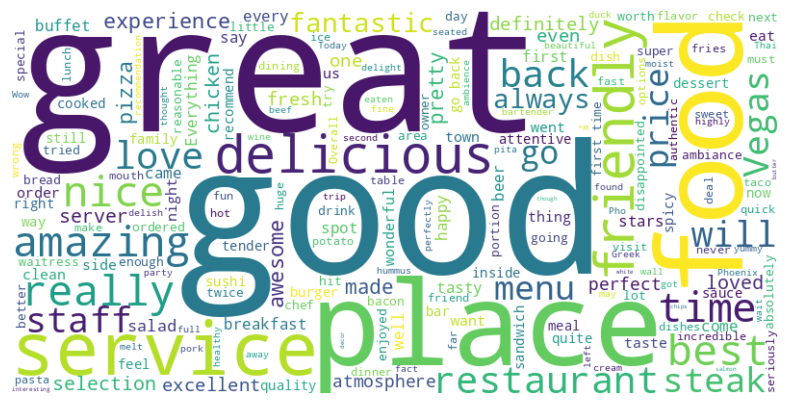

In [22]:
#import library
#positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
#generate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

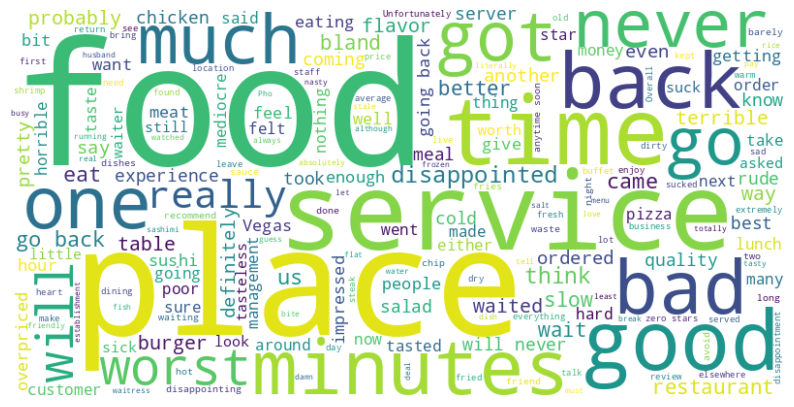

In [23]:
#import library
#negative review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])
#generate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer #countvectorizer is a method to covert text to numerical data
cv = CountVectorizer(max_features=1500)  #max_features=1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

split data-(1000,1500)
2parts-training and testing
so that we can train our model on training dataset and testing its accuracy on unseen test data

In [25]:
from sklearn.model_selection import train_test_split  #use to split the original data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train test splits are always dererministic. if you don't set seed, it is different each time.

#training(1000, 1500)
#1000*80/100= 800
#1000*20/100= 200

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

**takeaway points**: usually we take more and more data in training so its easy for the model to learn with more data

model training

In [27]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
# the multinomial naive bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification)

classifier = MultinomialNB()
classifier.fit(X_train, y_train) #fit training data

MultinomialNB()

In [28]:
# predicting the test set results
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [29]:
#accuracy, precision and recall

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("----scores----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----scores----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [30]:
# making the confusion matrix
# it is a table thatt is used to define the performance of classification algorithm it vizualizes and summarizes the classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

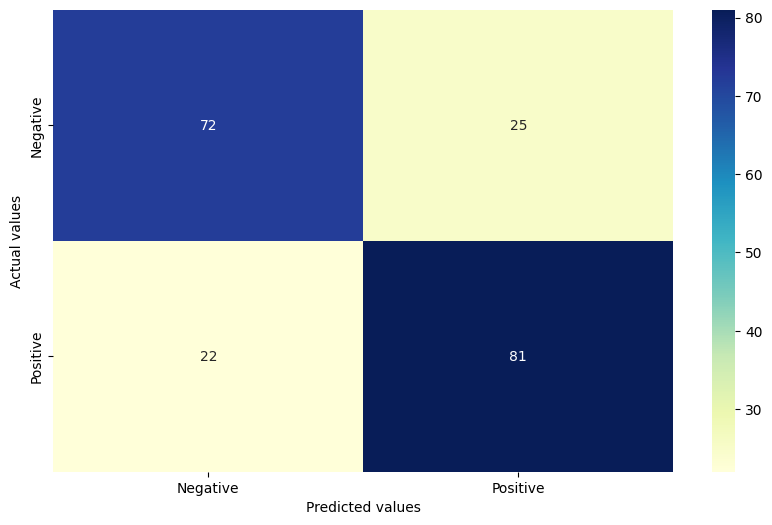

In [32]:
#plotting the confusion matrix
import matplotlib.pyplot as plt #it is a low level graph plotting library
import seaborn as sns #data vizualization lib based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu",xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [33]:
#hyperparameter tuning the naive bayes classifer
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha {} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('---------------------------------------------')
print('the best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha 0.1 is: 78.0%
Accuracy score for alpha 0.2 is: 78.5%
Accuracy score for alpha 0.3 is: 78.0%
Accuracy score for alpha 0.4 is: 78.0%
Accuracy score for alpha 0.5 is: 77.5%
Accuracy score for alpha 0.6 is: 77.5%
Accuracy score for alpha 0.7 is: 77.5%
Accuracy score for alpha 0.8 is: 77.0%
Accuracy score for alpha 0.9 is: 76.5%
Accuracy score for alpha 1.0 is: 76.5%
---------------------------------------------
the best accuracy is 78.5% with alpha value as 0.2


In [34]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [35]:
#predictions

def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words =[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [36]:
#predicting values
sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [37]:
#predicting values
sample_review = 'The food is really good.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a POSITIVE review.


In [38]:
#predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [39]:
#predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a POSITIVE review.


In [40]:
y_pred = classifier.predict(X_test)

y_pred

acc= round(classifier.score(X_train,y_train)*100,2)
print(str(acc)+'%')

95.25%


In [41]:
y_pred = classifier.predict(X_test)

y_pred

acc= round(classifier.score(X_test,y_test)*100,2)
print(str(acc)+'%')

78.5%


In [42]:
# fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
# n_estimators can be said as no.of trees, experiment with n_estimators to get better results
classifier = RandomForestClassifier(n_estimators= 501, criterion= 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [43]:
y_pred = classifier.predict(X_test)

y_pred

acc= round(classifier.score(X_train,y_train)*100,2)
print(str(acc)+'%')

99.62%


In [44]:
y_pred = classifier.predict(X_test)

y_pred

acc= round(classifier.score(X_test,y_test)*100,2)
print(str(acc)+'%')

70.5%


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("----scores----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----scores----
Accuracy score is: 70.5%
Precision score is: 84.38%
Recall score is: 52.43%


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [48]:
#predicticg values on test set
y_predicted = classifier.predict(X_test)

In [49]:
#checking test accuracy
accuracy_score(y_test,y_predicted)*100

68.0

In [50]:
#confusion metrix#
confusion_matrix(y_test, y_predicted)

array([[93,  4],
       [60, 43]])

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("----scores----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----scores----
Accuracy score is: 70.5%
Precision score is: 84.38%
Recall score is: 52.43%


In [52]:
#predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review.')

This is a NEGATIVE review.
